5.15.0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN       

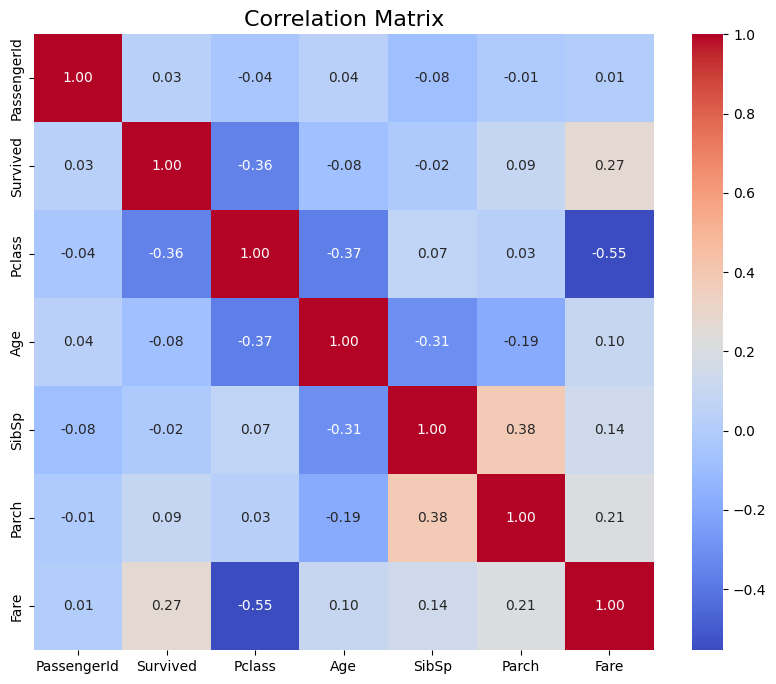

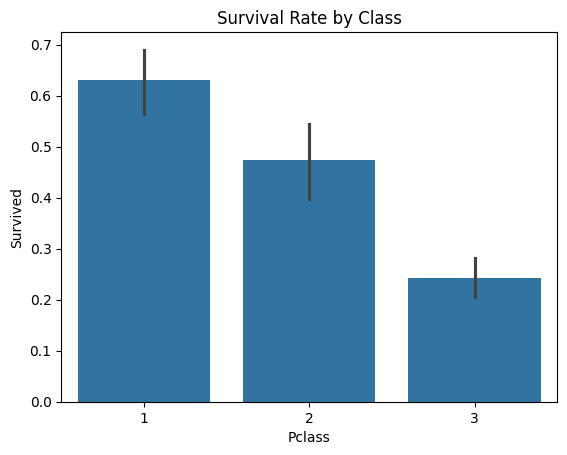

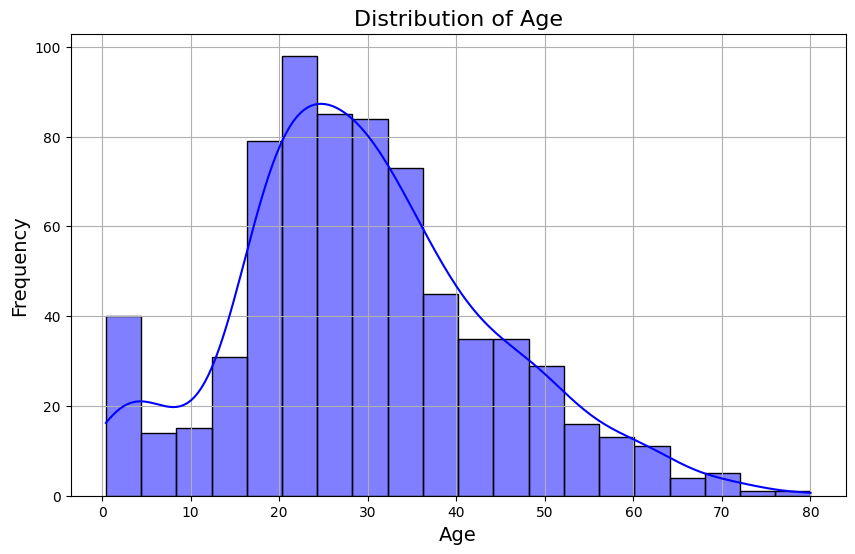

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings

from IPython.display import Image
import plotly
print(plotly.__version__)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Check if DataFrame is loaded correctly
print(df.head())
print(df.info())

# Ensure all columns are numeric for correlation
# Optionally, you can convert non-numeric columns or drop them
df_numeric = df.select_dtypes(include=[float, int])  # Only numeric columns

# Handle missing values if necessary
df_numeric = df_numeric.dropna()  # or use fillna() as needed

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix', fontsize=16)

# Show the plot
plt.show()
#show the survival
sns.barplot(x='Pclass', y='Survived', data =df)
plt.title('Survival Rate by Class')
plt.show()
# show figer
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')

# Add title and labels with proper formatting
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Create a new column 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Check for missing values
print(df.isnull().sum())

# Display unique values for 'Pclass' and 'Embarked'
print(df['Pclass'].unique())
print(df['Embarked'].unique())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64
[3 1 2]
['S' 'C' 'Q' nan]


In [47]:
# Group by 'Sex' and count survival status
survival_counts_by_sex = df.groupby('Sex')['Survived'].value_counts()
print(survival_counts_by_sex)


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


<ipython-input-48-a3ef518d669b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')


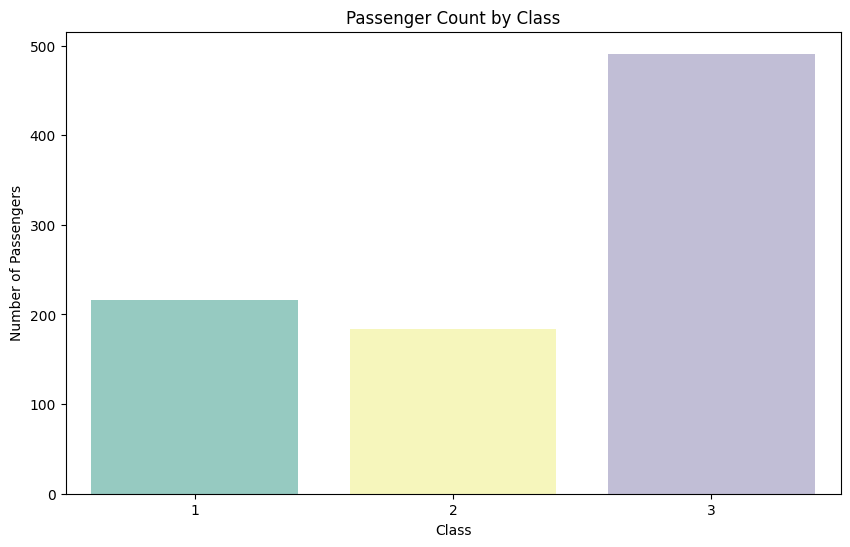

In [48]:
# Count the number of passengers in each class
class_counts = df['Pclass'].value_counts().sort_index()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.show()


  Port  Total
0    C    168
1    Q     77
2    S    644


<ipython-input-49-d44b8c27325d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=port_counts.index, y=port_counts.values, palette='viridis')


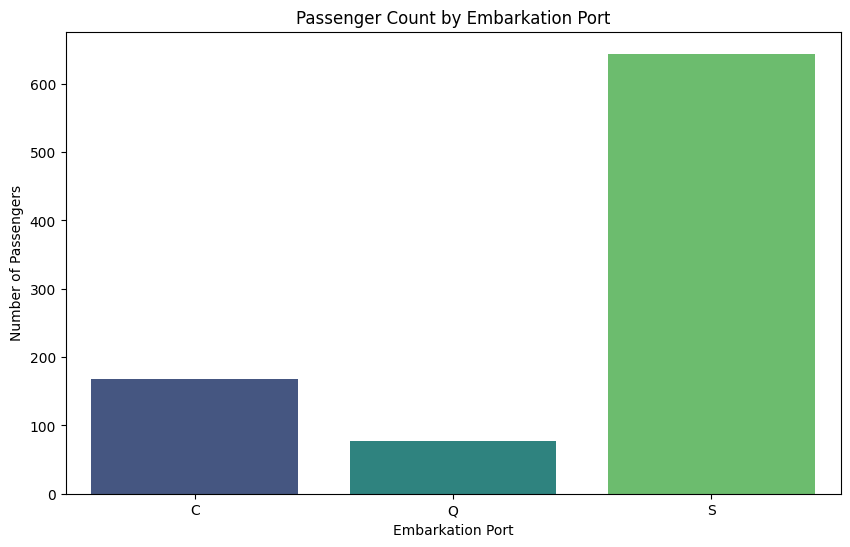

In [49]:
# Count the number of passengers by embarkation port
port_counts = df['Embarked'].value_counts().sort_index()

# Create a DataFrame for the embarkation port counts
port_counts_df = pd.DataFrame({
    'Port': port_counts.index,
    'Total': port_counts.values
})
print(port_counts_df)

# Create a bar plot to visualize the embarkation port distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=port_counts.index, y=port_counts.values, palette='viridis')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.show()


Number of females who survived: 233
Number of females who did not survive: 81


<ipython-input-50-76d5c6358175>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[num_female_survived, num_female_not_survived], palette='Set2')


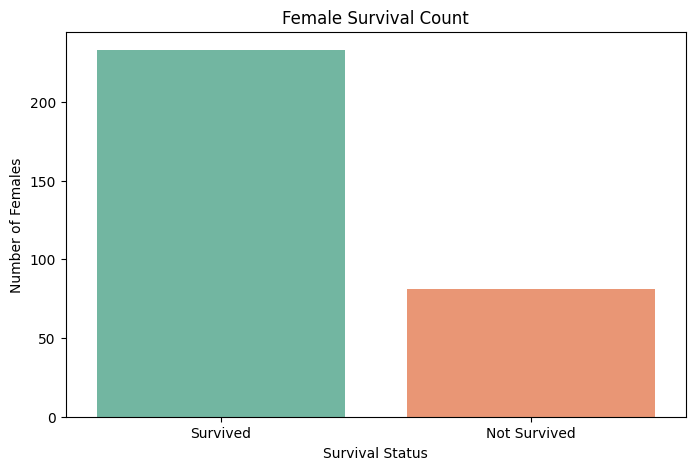

In [50]:
# Filter the dataset to include only females
female_passengers = df[df['Sex'] == 'female']

# Count the number of females who survived
female_survived = female_passengers[female_passengers['Survived'] == 1]
num_female_survived = len(female_survived)

# Count the number of females who did not survive
female_not_survived = female_passengers[female_passengers['Survived'] == 0]
num_female_not_survived = len(female_not_survived)

# Display the counts
print(f"Number of females who survived: {num_female_survived}")
print(f"Number of females who did not survive: {num_female_not_survived}")

# Create a bar plot to visualize female survival
plt.figure(figsize=(8, 5))
sns.barplot(x=['Survived', 'Not Survived'], y=[num_female_survived, num_female_not_survived], palette='Set2')
plt.title('Female Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Females')
plt.show()


Number of males who survived: 109
Number of males who did not survive: 468


<ipython-input-51-08d92a68f588>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Survived', 'Not Survived'], y=[num_male_survived, num_male_not_survived], palette='Set2')


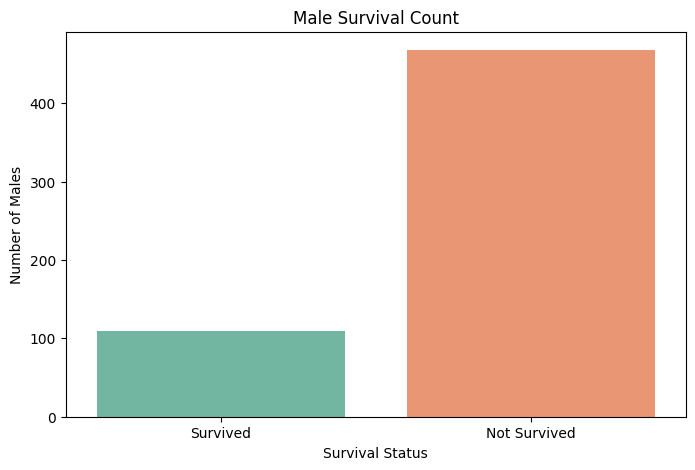

In [51]:
# Filter the dataset to include only males
male_passengers = df[df['Sex'] == 'male']

# Count the number of males who survived
male_survived = male_passengers[male_passengers['Survived'] == 1]
num_male_survived = len(male_survived)

# Count the number of males who did not survive
male_not_survived = male_passengers[male_passengers['Survived'] == 0]
num_male_not_survived = len(male_not_survived)

# Display the counts
print(f"Number of males who survived: {num_male_survived}")
print(f"Number of males who did not survive: {num_male_not_survived}")

# Create a bar plot to visualize male survival
plt.figure(figsize=(8, 5))
sns.barplot(x=['Survived', 'Not Survived'], y=[num_male_survived, num_male_not_survived], palette='Set2')
plt.title('Male Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Males')
plt.show()


<ipython-input-52-8d5b158a16ea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Pastel1')


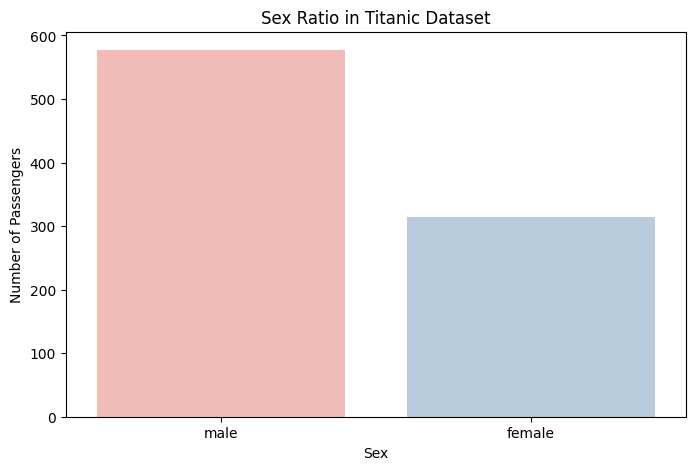

Sex Ratio in Titanic Dataset:
Sex
male      577
female    314
Name: count, dtype: int64


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Count the number of males and females
sex_counts = df['Sex'].value_counts()

# Create a bar plot to visualize the sex ratio
plt.figure(figsize=(8, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Pastel1')
plt.title('Sex Ratio in Titanic Dataset')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

# Print the sex ratio
print('Sex Ratio in Titanic Dataset:')
print(sex_counts)


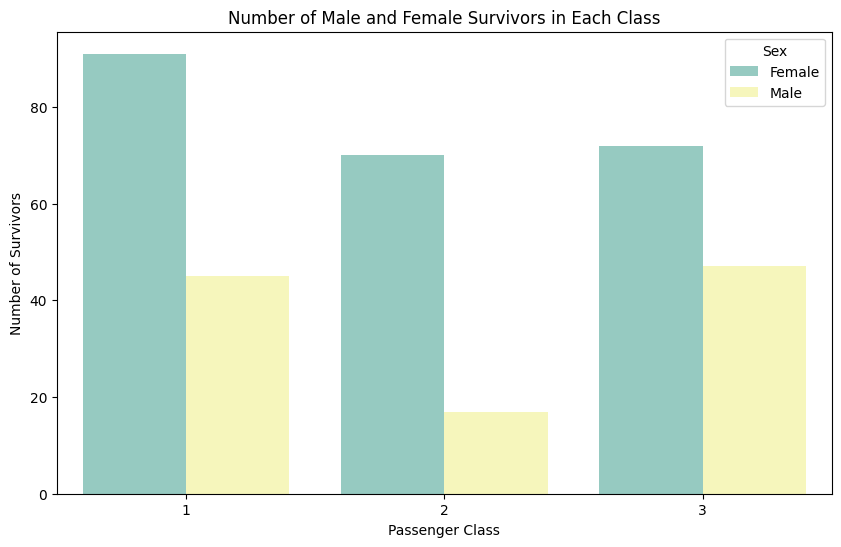

In [53]:
# Filter survivors
survivors = df[df['Survived'] == 1]

# Create a bar plot to visualize the number of male and female survivors in each class
plt.figure(figsize=(10, 6))
sns.countplot(data=survivors, x='Pclass', hue='Sex', palette='Set3')
plt.title('Number of Male and Female Survivors in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()


In [54]:
# Count survivors by class and sex
survivors_by_class = survivors.groupby(['Pclass', 'Sex']).size().unstack()
print("Number of Male and Female Survivors in Each Class:")
print(survivors_by_class)


Number of Male and Female Survivors in Each Class:
Sex     female  male
Pclass              
1           91    45
2           70    17
3           72    47


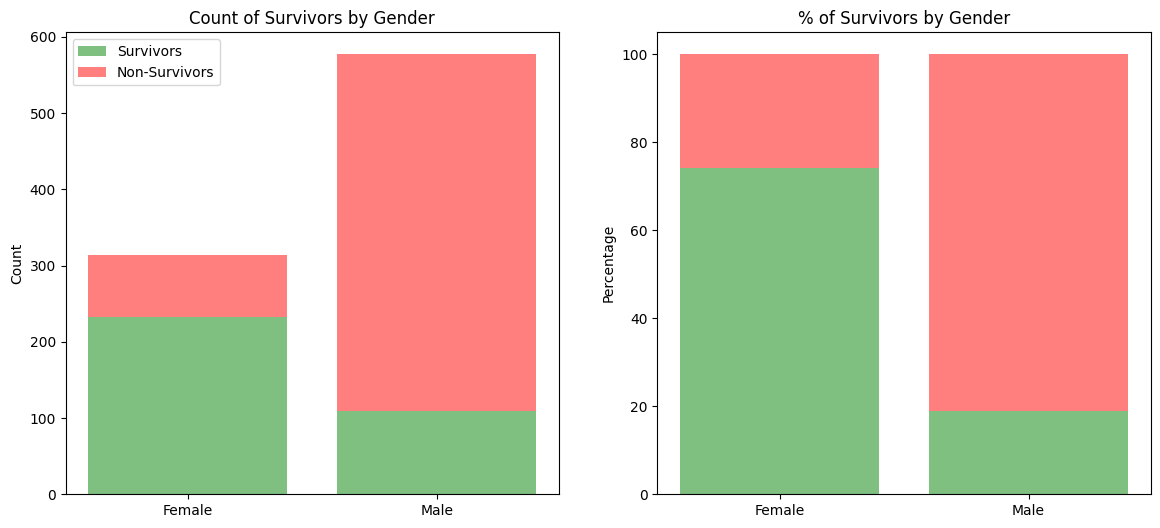

Chi-Square Test: 260.71702016732104
P-Value: 1.1973570627755645e-58


In [55]:
from scipy import stats

# Assume non_survivors is filtered from the main DataFrame
non_survivors = df[df['Survived'] == 0]

# Calculate values for each survival status
survivors_gender = survivors.groupby('Sex').size().values
non_survivors_gender = non_survivors.groupby('Sex').size().values

# Calculate totals and percentages
totals_gender = survivors_gender + non_survivors_gender
data1_percentages = (survivors_gender / totals_gender) * 100
data2_percentages = (non_survivors_gender / totals_gender) * 100

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Plot count of survivors by gender
ax1.bar(gender_categories, survivors_gender, label='Survivors', alpha=0.5, color='g')
ax1.bar(gender_categories, non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='r')
ax1.set_ylabel('Count')
ax1.set_title('Count of Survivors by Gender')
ax1.legend(loc='upper left')

# Plot percentage of survivors by gender
ax2.bar(gender_categories, data1_percentages, alpha=0.5, color='g')
ax2.bar(gender_categories, data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
ax2.set_ylabel('Percentage')
ax2.set_title('% of Survivors by Gender')
plt.show()

# Chi-Square Test
table = pd.crosstab(df['Survived'], df['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table)
print(f"Chi-Square Test: {chi2}")
print(f"P-Value: {p}")


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Check if 'age_group' exists
if 'age_group' not in df.columns:
    print("Error: 'age_group' column is missing from the dataset.")
else:
    # Assuming 'age_group' column exists
    age_labels = sorted(df['age_group'].unique())
    tick_spacing = np.arange(len(age_labels))

    # Plot count of survivors by age group
    survivors = df[df['Survived'] == 1]
    non_survivors = df[df['Survived'] == 0]

    survivors_age_group = survivors.groupby('age_group').size().reindex(age_labels, fill_value=0).values
    non_survivors_age_group = non_survivors.groupby('age_group').size().reindex(age_labels, fill_value=0).values

    # Calculate percentages
    totals_age_group = survivors_age_group + non_survivors_age_group
    data1_percentages_age_group = (survivors_age_group / totals_age_group) * 100
    data2_percentages_age_group = (non_survivors_age_group / totals_age_group) * 100

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot count of survivors by age group
    ax1.bar(tick_spacing - 0.2, survivors_age_group, width=0.4, label='Survivors', alpha=0.5, color='g')
    ax1.bar(tick_spacing + 0.2, non_survivors_age_group, width=0.4, label='Non-Survivors', alpha=0.5, color='r')
    ax1.set_xticks(tick_spacing)
    ax1.set_xticklabels(age_labels)
    ax1.set_ylabel('Count')
    ax1.set_title('Count of Survivors by Age Group')
    ax1.legend(loc='upper right')

    # Plot percentage of survivors by age group
    ax2.bar(tick_spacing - 0.2, data1_percentages_age_group, width=0.4, alpha=0.5, color='g')
    ax2.bar(tick_spacing + 0.2, data2_percentages_age_group, width=0.4, alpha=0.5, color='r')
    ax2.set_xticks(tick_spacing)
    ax2.set_xticklabels(age_labels)
    ax2.set_ylabel('Percentage')
    ax2.set_title('% of Survivors by Age Group')
    plt.show()

    # Calculate the proportion of survivors by age group and gender
    male_data = df[df['Sex'] == 'male'].groupby('age_group')['Survived'].mean().reindex(age_labels, fill_value=0).values
    female_data = df[df['Sex'] == 'female'].groupby('age_group')['Survived'].mean().reindex(age_labels, fill_value=0).values

    f, ax = plt.subplots(figsize=(10, 6))
    male_plt_position = tick_spacing - 0.2
    female_plt_position = tick_spacing + 0.2
    ax.bar(male_plt_position, male_data, width=0.4, label='Male', color='b')
    ax.bar(female_plt_position, female_data, width=0.4, label='Female', color='r')
    ax.set_xticks(tick_spacing)
    ax.set_xticklabels(age_labels)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('Age Group')
    ax.set_title('Proportion of Survivors by Age Group and Gender')
    ax.legend(loc='best')
    plt.show()

    # Chi-Square Test for Age Group
    table_age_group = pd.crosstab(df['Survived'], df['age_group'])
    chi2, p, dof, expected = stats.chi2_contingency(table_age_group)
    print(f"Chi-Square Test for Age Group: {chi2}")
    print(f"P-Value: {p}")


Error: 'age_group' column is missing from the dataset.
